In [18]:
# 주피터 노트북 환경설정
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

from IPython.core.display import display, HTML
# display(HTML("<style>.container { font-weight: bold !important; font-family:'Malgun Gothic' !important;}</style>"))
display(HTML("<style>.container { font-weight: bold !important;}</style>"))
display(HTML("<style>.container { width: 98% !important; }</style>"))

In [19]:
import numpy as np
import pandas as pd
import os

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# 관련 라이브러리 임포트 
import matplotlib.font_manager as fm

#  한글글꼴로 변경
# plt.rcParams['font.family'] = '한글글꼴명'
plt.rcParams['font.size'] = 11.0
# plt.rcParams['font.family'] = 'batang'
plt.rcParams['font.family'] = 'Malgun Gothic'

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
matplotlib.rcParams['axes.unicode_minus'] = False

# 그래프 기본 크기 설정 
plt.rcParams['figure.figsize'] = [10, 6]

# 훈련 세트와 테스트 세트

## 훈련 세트와 테스트 세트

- 지도학습 Supervied learning : 입력과 타깃이 모두 있음
- 비지도학습 Unsupervied learning : 입력만 있음 

- 훈련데이타 = 입력 + 타깃 

- 머신러닝 알고리즘의 평가를 제대로 평가하려면 훈련 데이터와 평가에 사용할 데이터가 각각 달라야한다. 
- 평가를 위한 또 다른 데이터를 준비하거나 이미 준비된 데이타중에서 일부를 떼어 내어 활용한다. 
- 테스트 세트 test set : 평가에 사용하는 데이타.
- 훈련 세트 traing set : 훈련에 사용되는 데이타.  

###  데이타수집 

- http://bit.ly/bream_smelt

In [1]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [2]:
len(fish_length), len(fish_weight)

(49, 49)

In [3]:
fish_data = [[l, w] for l, w in zip(fish_length, fish_weight)]
fish_target = [1]*35 + [0]*14

In [4]:
len(fish_data), len(fish_target)

(49, 49)

In [5]:
fish_data[:5]

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0]]

In [6]:
fish_target[:5]

[1, 1, 1, 1, 1]

##### 훈련데이타, 테스트데이타를 분리해서 모델 생성 및 테스트 

In [7]:
from sklearn.neighbors import KNeighborsClassifier

model_kn = KNeighborsClassifier()
model_kn

KNeighborsClassifier()

In [8]:
print(fish_data[4])

[29.0, 430.0]


In [9]:
print(fish_data[0:5])

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0]]


In [10]:
print(fish_data[:5])

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0]]


In [11]:
print(fish_data[44:])

[[12.2, 12.2], [12.4, 13.4], [13.0, 12.2], [14.3, 19.7], [15.0, 19.9]]


In [12]:
# 학습용 데이타셋  생성 => 35개
# 도미로만 구성 
X_train = fish_data[:35]
y_train = fish_target[:35]

# 테스트용 데이타셋 생성 => 14개 
# 빙어로만 구성 
X_test = fish_data[35:]
y_test = fish_target[35:]

##### 샘플링 편향(Sampling bias) 

훈련세트와 테스트 세트에 샘플이 골고루 섞여있지 않고 샘플링이 한쪽에 치워쳤다 

In [13]:
model_kn = model_kn.fit(X_train, y_train)

model_kn.score(X_test, y_test)

0.0

In [16]:
# 도미 
X_train
# 빙어
X_test

[[9.8, 6.7],
 [10.5, 7.5],
 [10.6, 7.0],
 [11.0, 9.7],
 [11.2, 9.8],
 [11.3, 8.7],
 [11.8, 10.0],
 [11.8, 9.9],
 [12.0, 9.8],
 [12.2, 12.2],
 [12.4, 13.4],
 [13.0, 12.2],
 [14.3, 19.7],
 [15.0, 19.9]]

# 넘파이를 이용한 데이타셋 만들기

In [20]:
# 넘파이 배열화 
input_arr = np.array(fish_data)
target_arr = np.array(fish_target)

In [22]:
# print(input_arr)

In [23]:
print(input_arr.shape)

(49, 2)


In [27]:
# 랜덤한 인덱스 생성 
# 랜덤한 숫자를 고정화 
np.random.seed(42) 

# 데이타의 크기만큼 인덱스 넘파이 배열 생성 
index = np.arange(49)
print('Before : ', index)

# 무작위로 순서 재설정 
np.random.shuffle(index)
print('After : ', index)

Before :  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48]
After :  [13 45 47 44 17 27 26 25 31 19 12  4 34  8  3  6 40 41 46 15  9 16 24 33
 30  0 43 32  5 29 11 36  1 21  2 37 35 23 39 10 22 18 48 20  7 42 14 28
 38]


In [28]:
print(index)

[13 45 47 44 17 27 26 25 31 19 12  4 34  8  3  6 40 41 46 15  9 16 24 33
 30  0 43 32  5 29 11 36  1 21  2 37 35 23 39 10 22 18 48 20  7 42 14 28
 38]


In [29]:
input_arr[:5]

array([[ 25.4, 242. ],
       [ 26.3, 290. ],
       [ 26.5, 340. ],
       [ 29. , 363. ],
       [ 29. , 430. ]])

In [30]:
input_arr[[1,3]]

array([[ 26.3, 290. ],
       [ 29. , 363. ]])

In [31]:
input_arr[1], input_arr[3]

(array([ 26.3, 290. ]), array([ 29., 363.]))

In [32]:
# 랜덤한 인덱스를 넘파이 배열에 설정 
# 학습 데이타 35개 
X_train = input_arr[index[:35]]
y_train = target_arr[index[:35]]

In [34]:
input_arr

array([[  25.4,  242. ],
       [  26.3,  290. ],
       [  26.5,  340. ],
       [  29. ,  363. ],
       [  29. ,  430. ],
       [  29.7,  450. ],
       [  29.7,  500. ],
       [  30. ,  390. ],
       [  30. ,  450. ],
       [  30.7,  500. ],
       [  31. ,  475. ],
       [  31. ,  500. ],
       [  31.5,  500. ],
       [  32. ,  340. ],
       [  32. ,  600. ],
       [  32. ,  600. ],
       [  33. ,  700. ],
       [  33. ,  700. ],
       [  33.5,  610. ],
       [  33.5,  650. ],
       [  34. ,  575. ],
       [  34. ,  685. ],
       [  34.5,  620. ],
       [  35. ,  680. ],
       [  35. ,  700. ],
       [  35. ,  725. ],
       [  35. ,  720. ],
       [  36. ,  714. ],
       [  36. ,  850. ],
       [  37. , 1000. ],
       [  38.5,  920. ],
       [  38.5,  955. ],
       [  39.5,  925. ],
       [  41. ,  975. ],
       [  41. ,  950. ],
       [   9.8,    6.7],
       [  10.5,    7.5],
       [  10.6,    7. ],
       [  11. ,    9.7],
       [  11.2,    9.8],


In [35]:
# 잘 섞였는지 확인 
print(input_arr[13], X_train[0])

[ 32. 340.] [ 32. 340.]


In [37]:
y_train

array([1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1])

In [38]:
# 랜덤한 인덱스를 넘파이 배열에 설정 
# 테스트 데이타 14개 
X_test = input_arr[index[35:]]
y_test = target_arr[index[35:]]

In [40]:
X_test

array([[ 10.6,   7. ],
       [  9.8,   6.7],
       [ 35. , 680. ],
       [ 11.2,   9.8],
       [ 31. , 475. ],
       [ 34.5, 620. ],
       [ 33.5, 610. ],
       [ 15. ,  19.9],
       [ 34. , 575. ],
       [ 30. , 390. ],
       [ 11.8,   9.9],
       [ 32. , 600. ],
       [ 36. , 850. ],
       [ 11. ,   9.7]])

In [39]:
y_test

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])

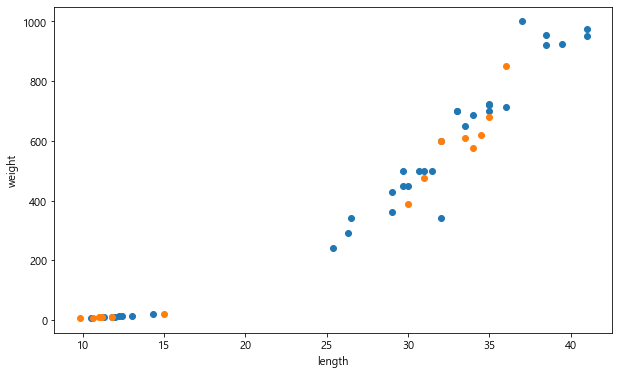

In [41]:
import matplotlib.pyplot as plt
# 학습 데이타 시각화 - 파랑색
plt.scatter(X_train[:, 0], X_train[:, 1])
# 테스트 데이타 시각화 - 오렌지색 
plt.scatter(X_test[:, 0], X_test[:, 1])
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

## 머신러닝 학습 및 평가

In [42]:
model_kn = KNeighborsClassifier()
model_kn.fit(X_train, y_train)

KNeighborsClassifier()

In [43]:
model_kn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [44]:
from sklearn.metrics import accuracy_score, mean_squared_error

In [45]:
result = accuracy_score(y_test, model_kn.predict(X_test))
print(f'정답률은? {result*100} %')

정답률은? 100.0 %


In [46]:
# 에러률 
result = mean_squared_error(y_test, model_kn.predict(X_test))
print(f'에러률은? {result*100} %')

에러률은? 0.0 %


In [47]:
model_kn.score(X_train, y_train)

1.0

In [48]:
model_kn.score(X_test, y_test)

1.0

In [49]:
model_kn.predict(X_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])

In [50]:
y_test

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])

In [54]:
# 1의 갯수는?
len(y_test), list(y_test).count(1)

(14, 8)

## ** 학습 데이터와 테스트 데이터 세트 분리 메서드  **

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
train_test_split?

In [92]:
fish_data = [[l, w] for l, w in zip(fish_length, fish_weight)]
fish_target = [1]*35 + [0]*14

In [93]:
# train_test_split?

In [94]:
# 학습용 80%, 테스트용20% 분리,  
X_train, X_test, y_train, y_test = train_test_split( np.array(fish_data), fish_target, test_size=0.2,
                                                    random_state=1, stratify=fish_target)

In [95]:
len(X_train), len(X_test), len(y_train), len(y_test)

(39, 10, 39, 10)

In [96]:
X_train[0], y_train[0]

(array([ 34.5, 620. ]), 1)

In [97]:
type(X_train), type(y_train)

(numpy.ndarray, list)

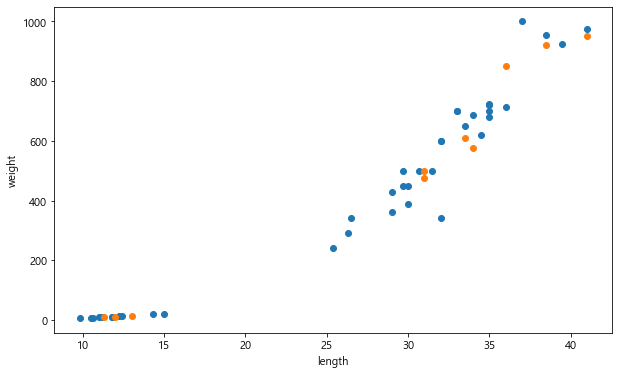

In [98]:
import matplotlib.pyplot as plt

plt.scatter(X_train[:, 0], X_train[:, 1])
plt.scatter(X_test[:, 0], X_test[:, 1])
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [99]:
print(fish_data)
print('='*50)
print(fish_target)
print('='*50)
print(X_train)
print('='*50)
print(y_train)

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0], [29.7, 450.0], [29.7, 500.0], [30.0, 390.0], [30.0, 450.0], [30.7, 500.0], [31.0, 475.0], [31.0, 500.0], [31.5, 500.0], [32.0, 340.0], [32.0, 600.0], [32.0, 600.0], [33.0, 700.0], [33.0, 700.0], [33.5, 610.0], [33.5, 650.0], [34.0, 575.0], [34.0, 685.0], [34.5, 620.0], [35.0, 680.0], [35.0, 700.0], [35.0, 725.0], [35.0, 720.0], [36.0, 714.0], [36.0, 850.0], [37.0, 1000.0], [38.5, 920.0], [38.5, 955.0], [39.5, 925.0], [41.0, 975.0], [41.0, 950.0], [9.8, 6.7], [10.5, 7.5], [10.6, 7.0], [11.0, 9.7], [11.2, 9.8], [11.3, 8.7], [11.8, 10.0], [11.8, 9.9], [12.0, 9.8], [12.2, 12.2], [12.4, 13.4], [13.0, 12.2], [14.3, 19.7], [15.0, 19.9]]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[[  34.5  620. ]
 [  30.   390. ]
 [  25.4  242. ]
 [  33.5  650. ]
 [  11.8    9.9]
 [  26.3  290. ]
 [  33.   700. ]
 [  11.2    9.8]
 [

In [104]:
y_test.count(0), y_test.count(1), 3/7

(3, 7, 0.42857142857142855)

In [105]:
y_train.count(0), y_train.count(1), 11/28

(11, 28, 0.39285714285714285)

In [101]:
len(y_test)

10

In [89]:
len(y_test)*0.2, len(y_train)*0.8

(2.0, 31.200000000000003)

In [72]:
# 학습 
model_kn = KNeighborsClassifier()
model_kn.fit(X_train, y_train)

KNeighborsClassifier()

In [73]:
# 예측 
model_kn.predict(X_test)

array([1, 1, 1, 1, 1, 1, 0, 1, 0, 0])

In [74]:
y_test

[1, 1, 1, 1, 1, 1, 0, 1, 0, 0]

In [75]:
model_kn.score(X_train, y_train)

1.0

In [76]:
model_kn.score(X_test, y_test)

1.0

In [77]:
result = accuracy_score(y_test, model_kn.predict(X_test))
print(f'정답률은? {result*100} %')

정답률은? 100.0 %


In [78]:
# 에러률 
result = mean_squared_error(y_test, model_kn.predict(X_test))
print(f'에러률은? {result*100} %')

에러률은? 0.0 %


### 

In [81]:
penguins = sns.load_dataset('penguins')

In [82]:
penguins.shape

(344, 7)

In [83]:
penguins.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

In [84]:
penguins['species'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [85]:
penguins.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

# 퀴즈 

아래의 데이타는 펭귄의 날개 길이와 몸무게 그리고 그에 따른 펭귄의 종류이다. 

 펭귄의 날개 길이와 몸무게 => X
 
 펭귄의 종류 => y
 
 사이킷런에서 제공하는 분류기 알고리즘을 이용하여 머신러닝 모델을 생성하고 테스트하여라. 

In [4]:
print(flipper_length)
print(body_mass )
print(species)

[181.0, 186.0, 195.0, 193.0, 190.0, 181.0, 195.0, 182.0, 191.0, 198.0, 185.0, 195.0, 197.0, 184.0, 194.0, 174.0, 180.0, 189.0, 185.0, 180.0, 187.0, 183.0, 187.0, 172.0, 180.0, 178.0, 178.0, 188.0, 184.0, 195.0, 196.0, 190.0, 180.0, 181.0, 184.0, 182.0, 195.0, 186.0, 196.0, 185.0, 190.0, 182.0, 190.0, 191.0, 186.0, 188.0, 190.0, 200.0, 187.0, 191.0, 186.0, 193.0, 181.0, 194.0, 185.0, 195.0, 185.0, 192.0, 184.0, 192.0, 195.0, 188.0, 190.0, 198.0, 190.0, 190.0, 196.0, 197.0, 190.0, 195.0, 191.0, 184.0, 187.0, 195.0, 189.0, 196.0, 187.0, 193.0, 191.0, 194.0, 190.0, 189.0, 189.0, 190.0, 202.0, 205.0, 185.0, 186.0, 187.0, 208.0, 190.0, 196.0, 178.0, 192.0, 192.0, 203.0, 183.0, 190.0, 193.0, 184.0, 199.0, 190.0, 181.0, 197.0, 198.0, 191.0, 193.0, 197.0, 191.0, 196.0, 188.0, 199.0, 189.0, 189.0, 187.0, 198.0, 176.0, 202.0, 186.0, 199.0, 191.0, 195.0, 191.0, 210.0, 190.0, 197.0, 193.0, 199.0, 187.0, 190.0, 191.0, 200.0, 185.0, 193.0, 193.0, 187.0, 188.0, 190.0, 192.0, 185.0, 190.0, 184.0, 195.0

<ipython-input-4-45eeced6d074>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


In [131]:
flipper_length = [181.0, 186.0, 195.0, 193.0, 190.0, 181.0, 195.0, 182.0, 191.0, 198.0, 185.0, 195.0, 197.0, 184.0, 194.0, 174.0, 180.0, 189.0, 185.0, 180.0, 187.0, 183.0, 187.0, 172.0, 180.0, 178.0, 178.0, 188.0, 184.0, 195.0, 196.0, 190.0, 180.0, 181.0, 184.0, 182.0, 195.0, 186.0, 196.0, 185.0, 190.0, 182.0, 190.0, 191.0, 186.0, 188.0, 190.0, 200.0, 187.0, 191.0, 186.0, 193.0, 181.0, 194.0, 185.0, 195.0, 185.0, 192.0, 184.0, 192.0, 195.0, 188.0, 190.0, 198.0, 190.0, 190.0, 196.0, 197.0, 190.0, 195.0, 191.0, 184.0, 187.0, 195.0, 189.0, 196.0, 187.0, 193.0, 191.0, 194.0, 190.0, 189.0, 189.0, 190.0, 202.0, 205.0, 185.0, 186.0, 187.0, 208.0, 190.0, 196.0, 178.0, 192.0, 192.0, 203.0, 183.0, 190.0, 193.0, 184.0, 199.0, 190.0, 181.0, 197.0, 198.0, 191.0, 193.0, 197.0, 191.0, 196.0, 188.0, 199.0, 189.0, 189.0, 187.0, 198.0, 176.0, 202.0, 186.0, 199.0, 191.0, 195.0, 191.0, 210.0, 190.0, 197.0, 193.0, 199.0, 187.0, 190.0, 191.0, 200.0, 185.0, 193.0, 193.0, 187.0, 188.0, 190.0, 192.0, 185.0, 190.0, 184.0, 195.0, 193.0, 187.0, 201.0, 211.0, 230.0, 210.0, 218.0, 215.0, 210.0, 211.0, 219.0, 209.0, 215.0, 214.0, 216.0, 214.0, 213.0, 210.0, 217.0, 210.0, 221.0, 209.0, 222.0, 218.0, 215.0, 213.0, 215.0, 215.0, 215.0, 215.0, 210.0, 220.0, 222.0, 209.0, 207.0, 230.0, 220.0, 220.0, 213.0, 219.0, 208.0, 208.0, 208.0, 225.0, 210.0, 216.0, 222.0, 217.0, 210.0, 225.0, 213.0, 215.0, 210.0, 220.0, 210.0, 225.0, 217.0, 220.0, 208.0, 220.0, 208.0, 224.0, 208.0, 221.0, 214.0, 231.0, 219.0, 230.0, 229.0, 220.0, 223.0, 216.0, 221.0, 221.0, 217.0, 216.0, 230.0, 209.0, 220.0, 215.0, 223.0, 212.0, 221.0, 212.0, 224.0, 212.0, 228.0, 218.0, 218.0, 212.0, 230.0, 218.0, 228.0, 212.0, 224.0, 214.0, 226.0, 216.0, 222.0, 203.0, 225.0, 219.0, 228.0, 215.0, 228.0, 215.0, 210.0, 219.0, 208.0, 209.0, 216.0, 229.0, 213.0, 230.0, 217.0, 230.0, 222.0, 214.0, 215.0, 222.0, 212.0, 213.0]

In [132]:
body_mass = [3750.0, 3800.0, 3250.0, 3450.0, 3650.0, 3625.0, 4675.0, 3200.0, 3800.0, 4400.0, 3700.0, 3450.0, 4500.0, 3325.0, 4200.0, 3400.0, 3600.0, 3800.0, 3950.0, 3800.0, 3800.0, 3550.0, 3200.0, 3150.0, 3950.0, 3250.0, 3900.0, 3300.0, 3900.0, 3325.0, 4150.0, 3950.0, 3550.0, 3300.0, 4650.0, 3150.0, 3900.0, 3100.0, 4400.0, 3000.0, 4600.0, 3425.0, 3450.0, 4150.0, 3500.0, 4300.0, 3450.0, 4050.0, 2900.0, 3700.0, 3550.0, 3800.0, 2850.0, 3750.0, 3150.0, 4400.0, 3600.0, 4050.0, 2850.0, 3950.0, 3350.0, 4100.0, 3050.0, 4450.0, 3600.0, 3900.0, 3550.0, 4150.0, 3700.0, 4250.0, 3700.0, 3900.0, 3550.0, 4000.0, 3200.0, 4700.0, 3800.0, 4200.0, 3350.0, 3550.0, 3800.0, 3500.0, 3950.0, 3600.0, 3550.0, 4300.0, 3400.0, 4450.0, 3300.0, 4300.0, 3700.0, 4350.0, 2900.0, 4100.0, 3725.0, 4725.0, 3075.0, 4250.0, 2925.0, 3550.0, 3750.0, 3900.0, 3175.0, 4775.0, 3825.0, 4600.0, 3200.0, 4275.0, 3900.0, 4075.0, 2900.0, 3775.0, 3350.0, 3325.0, 3150.0, 3500.0, 3450.0, 3875.0, 3050.0, 4000.0, 3275.0, 4300.0, 3050.0, 4000.0, 3325.0, 3500.0, 3500.0, 4475.0, 3425.0, 3900.0, 3175.0, 3975.0, 3400.0, 4250.0, 3400.0, 3475.0, 3050.0, 3725.0, 3000.0, 3650.0, 4250.0, 3475.0, 3450.0, 3750.0, 3700.0, 4000.0, 4500.0, 5700.0, 4450.0, 5700.0, 5400.0, 4550.0, 4800.0, 5200.0, 4400.0, 5150.0, 4650.0, 5550.0, 4650.0, 5850.0, 4200.0, 5850.0, 4150.0, 6300.0, 4800.0, 5350.0, 5700.0, 5000.0, 4400.0, 5050.0, 5000.0, 5100.0, 5650.0, 4600.0, 5550.0, 5250.0, 4700.0, 5050.0, 6050.0, 5150.0, 5400.0, 4950.0, 5250.0, 4350.0, 5350.0, 3950.0, 5700.0, 4300.0, 4750.0, 5550.0, 4900.0, 4200.0, 5400.0, 5100.0, 5300.0, 4850.0, 5300.0, 4400.0, 5000.0, 4900.0, 5050.0, 4300.0, 5000.0, 4450.0, 5550.0, 4200.0, 5300.0, 4400.0, 5650.0, 4700.0, 5700.0, 5800.0, 4700.0, 5550.0, 4750.0, 5000.0, 5100.0, 5200.0, 4700.0, 5800.0, 4600.0, 6000.0, 4750.0, 5950.0, 4625.0, 5450.0, 4725.0, 5350.0, 4750.0, 5600.0, 4600.0, 5300.0, 4875.0, 5550.0, 4950.0, 5400.0, 4750.0, 5650.0, 4850.0, 5200.0, 4925.0, 4875.0, 4625.0, 5250.0, 4850.0, 5600.0, 4975.0, 5500.0, 5500.0, 4700.0, 5500.0, 4575.0, 5500.0, 5000.0, 5950.0, 4650.0, 5500.0, 4375.0, 5850.0, 6000.0, 4925.0, 4850.0, 5750.0, 5200.0, 5400.0]

In [133]:
species = ['Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo']

In [134]:
penguins_data = np.hstack((np.array(flipper_length).reshape(-1,1), np.array(body_mass).reshape(-1,1)))
penguins_data.shape

(265, 2)

In [135]:
X_train, X_test, y_train, y_test = train_test_split( penguins_data, species, random_state=1, stratify=species, test_size=0.3)

In [136]:
X_train.shape, len(y_train)

((185, 2), 185)

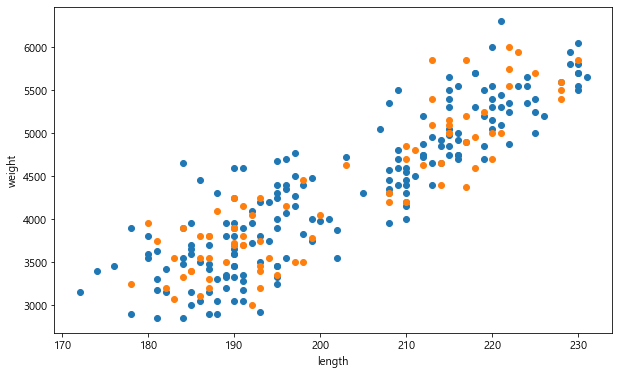

In [145]:
plt.scatter(X_train[:, 0], X_train[:, 1])
plt.scatter(X_test[:, 0], X_test[:, 1])
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [146]:
model_kn = KNeighborsClassifier()
model_kn.fit(X_train, y_train)

KNeighborsClassifier()

In [147]:
model_kn.score(X_test, y_test)

0.9625

In [148]:
model_kn.score(X_train, y_train)

0.9459459459459459

In [149]:
model_kn.predict(X_test)

array(['Gentoo', 'Gentoo', 'Gentoo', 'Adelie', 'Gentoo', 'Gentoo',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Gentoo', 'Adelie',
       'Adelie', 'Gentoo', 'Gentoo', 'Adelie', 'Gentoo', 'Adelie',
       'Gentoo', 'Gentoo', 'Adelie', 'Gentoo', 'Gentoo', 'Adelie',
       'Adelie', 'Adelie', 'Gentoo', 'Adelie', 'Gentoo', 'Adelie',
       'Adelie', 'Adelie', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo',
       'Gentoo', 'Adelie', 'Gentoo', 'Adelie', 'Adelie', 'Gentoo',
       'Adelie', 'Adelie', 'Adelie', 'Gentoo', 'Gentoo', 'Adelie',
       'Gentoo', 'Adelie', 'Gentoo', 'Adelie', 'Adelie', 'Gentoo',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Gentoo', 'Gentoo', 'Adelie', 'Gentoo',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Gentoo',
       'Adelie', 'Adelie', 'Adelie', 'Gentoo', 'Adelie', 'Gentoo',
       'Adelie', 'Adelie'], dtype='<U6')

In [150]:
print(y_test)

['Gentoo', 'Gentoo', 'Gentoo', 'Adelie', 'Gentoo', 'Gentoo', 'Adelie', 'Adelie', 'Gentoo', 'Adelie', 'Gentoo', 'Adelie', 'Adelie', 'Gentoo', 'Gentoo', 'Adelie', 'Gentoo', 'Adelie', 'Gentoo', 'Gentoo', 'Adelie', 'Gentoo', 'Gentoo', 'Adelie', 'Adelie', 'Adelie', 'Gentoo', 'Adelie', 'Gentoo', 'Adelie', 'Adelie', 'Adelie', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Adelie', 'Gentoo', 'Adelie', 'Adelie', 'Gentoo', 'Adelie', 'Adelie', 'Adelie', 'Gentoo', 'Gentoo', 'Adelie', 'Gentoo', 'Adelie', 'Gentoo', 'Adelie', 'Adelie', 'Gentoo', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Gentoo', 'Gentoo', 'Adelie', 'Gentoo', 'Adelie', 'Adelie', 'Gentoo', 'Adelie', 'Adelie', 'Gentoo', 'Adelie', 'Adelie', 'Adelie', 'Gentoo', 'Adelie', 'Gentoo', 'Gentoo', 'Adelie']


<AxesSubplot:xlabel='flipper_length', ylabel='body_mass'>

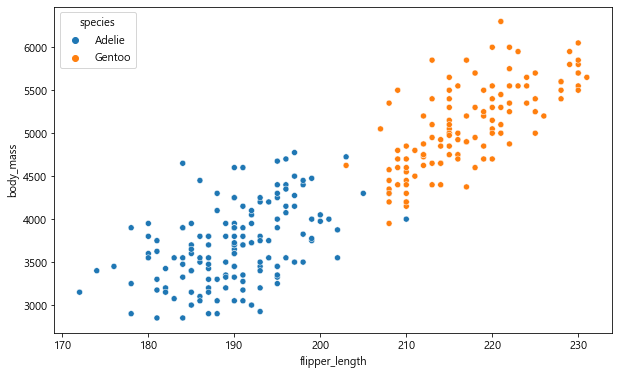

In [151]:
import pandas as pd

df_p = pd.DataFrame(penguins_data, columns=['flipper_length', 'body_mass'])
df_p['species'] = species
sns.scatterplot(x='flipper_length', y='body_mass', data=df_p, hue='species')

In [152]:
from sklearn.metrics import accuracy_score, mean_squared_error

result = accuracy_score(y_test, model_kn.predict(X_test))
print(f'정답률은? {result*100} %')

정답률은? 96.25 %


<AxesSubplot:xlabel='flipper_length_mm', ylabel='body_mass_g'>

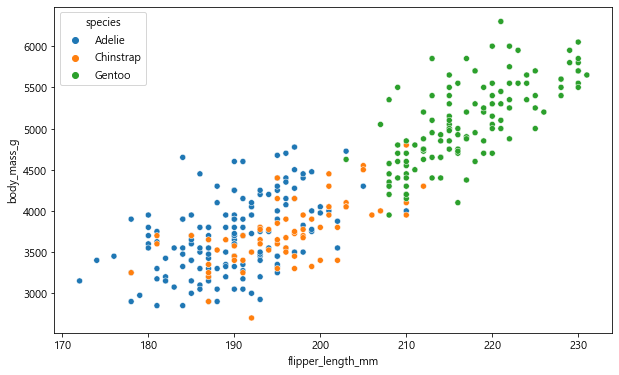

In [154]:
import seaborn as sns
penguins = sns.load_dataset("penguins")
sns.scatterplot(x='flipper_length_mm', y='body_mass_g', data=penguins, hue='species')